In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [2]:
from importlib import reload

import pygl as p
reload(p)

<module 'pygl' from 'C:\\Users\\user\\git\\portfolio-guaranteed-framework\\pygl\\__init__.py'>

<Figure size 360x360 with 0 Axes>

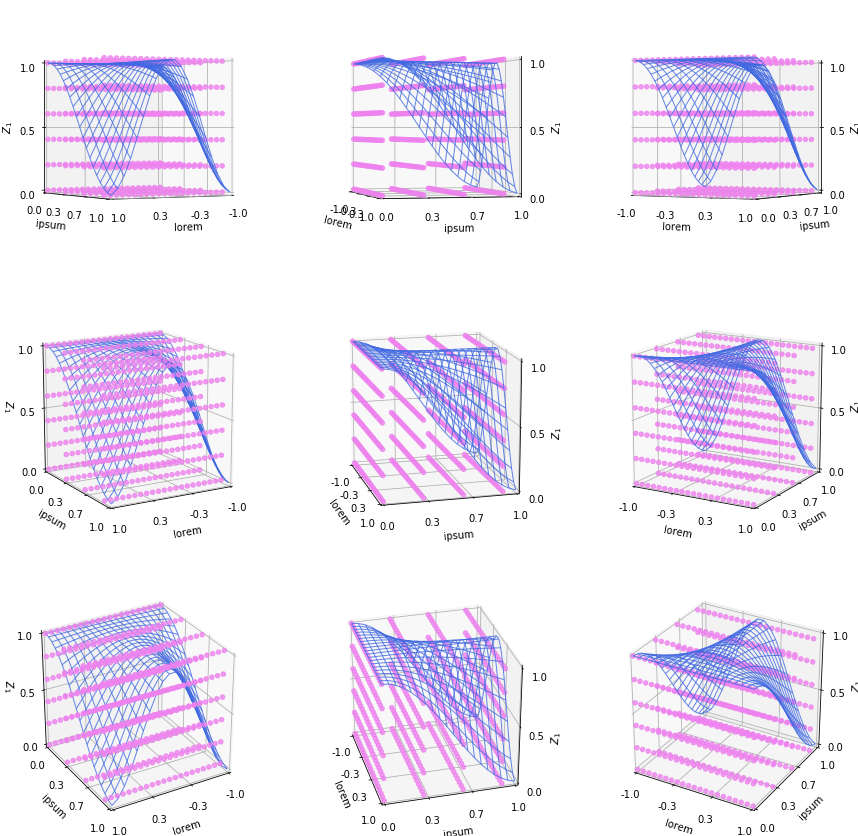

In [5]:
import numpy as np

from pygl import *

xlim=[-1,1]
ylim=[0,1]
zlim=[0,1]

obj1 = GridObject(delta=[0.1, 0.3, 0.2], color='violet', alpha=0.8)


Xgrid, Ygrid = np.meshgrid(np.linspace(xlim[0], xlim[1], 20), np.linspace(ylim[0], ylim[1], 20))
Zgrid = np.cos(1.5*Xgrid*Ygrid)**2

obj2 = SurfaceObject(Xgrid, Ygrid, Zgrid, wireframe=True, color='black', linewidth=1.0, edgecolor='royalblue', alpha=0.8, antialiased=True, label='$f(x)$')

# X = Xgrid.flatten()
# Y = Ygrid.flatten()
# Z = Zgrid.flatten()

# obj2 = SurfaceObject(X, Y, Z, color='black', linewidth=1.0, edgecolor='darkgrey', alpha=0.5, antialiased=True, label='$f(x)$')


sc = Scene(axes3D=True,
           figsize=(5,5),
           xlabel='lorem',
           ylabel='ipsum',
           zlabel='$Z_1$',
           xlim=xlim,
           ylim=ylim,
           zlim=zlim,
           xticks=4,
           xticklabels='.1f',
           yticks=4,
           yticklabels='.1f',
           zticks=3,
           zticklabels='.1f',
           font=10,
           tight_layout=True)

sc.append(obj1)
sc.append(obj2)

# sc.show()


elevation = [0, 15, 30]
azimuth = [60, -15, -60]

# sgrid = SceneGrid(3, 2, figsize=(2*6, 3*6))

# for i in range(sgrid.nrows):
#     for j in range(sgrid.ncols):
#         sgrid.add_scene(sgrid.gs[i,j], sc)

sgrid = IsometricSceneGrid(elevation, azimuth, sc)
        
sgrid.show()


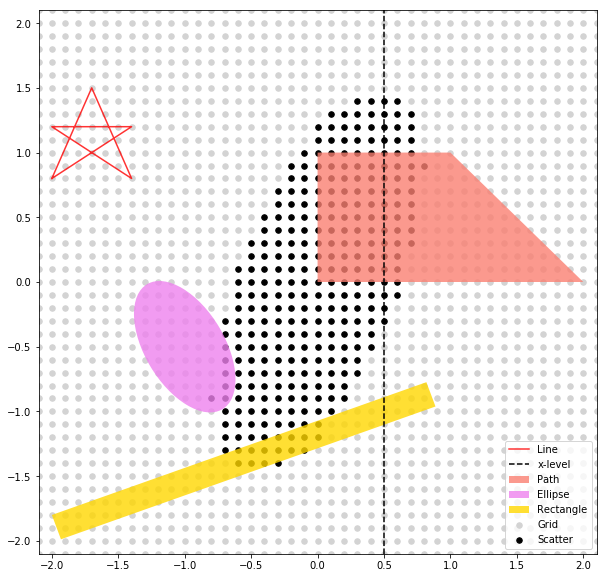

In [6]:
from robustfpm.pricing import EllipseHandler, Lattice


xlim=[-2.1, 2.1]
ylim=[-2.1, 2.1]

sc = Scene(xlim=xlim, ylim=ylim, legend_loc='lower right', background='w', figsize=(10,10))


msize=30

go = GridObject(0.1, label='Grid', c='lightgrey', s=msize)

sc.append(go)


sg1 = 0.8
sg2 = 1.5
rho = 0.6

g = Lattice(delta=go.delta)
K = EllipseHandler([0,0], np.array([[sg1**2, rho*sg1*sg2], [rho*sg1*sg2, sg2**2]]))

sc.append(ScatterObject(points=g.map2x(K.project(g)), label='Scatter', c='k', s=msize))


po = PathPatchObject(points=[[0,0], [1,1], [0,1], [2,0]], is_convex=True, facecolor='salmon', alpha=0.8, edgecolor='none', label='Path')
sc.append(po)


po = EllipsePatchObject([-1, -0.5], [0.3, 0.56], angle=30, facecolor='violet', alpha=0.8, edgecolor='none', label='Ellipse')
sc.append(po)


po = RectanglePatchObject([-2, -1.8], 0.2, 3, angle=-70, facecolor='gold', alpha=0.8, edgecolor='none', label='Rectangle')
sc.append(po)

po = LineObject(points=[[-2,0.8], [-1.7, 1.5], [-1.4, 0.8], [-2, 1.2], [-1.4, 1.2], [-2,0.8]], label='Line', c='r', alpha=0.8)
sc.append(po)

po = LevelLineObject(x=0.5, c='k', label='x-level', linestyle='dashed', alpha=1)
sc.append(po)

sc.show()